In [16]:
%matplotlib inline

from torch.utils.data import Dataset, DataLoader
from tqdm.notebook import tqdm as tqdm
from torchvision import transforms
import matplotlib.pyplot as plt
import torch.nn.functional as F
from torch import utils
import torch.nn as nn
import numpy as np
import os, imageio

import torch
import cv2

In [17]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [8]:
class Net(nn.Module):
    def __init__(self,input_dim):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(input_dim, 50) # input has 4 dimensions.
        self.fc1_drop = nn.Dropout(0.2)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(50, 50)
        self.fc2_drop = nn.Dropout(0.2)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(50,3)

    def forward(self, x):
        # x = x.view(-1,4) # input has 4 dimensions.
        x = self.relu1(self.fc1(x))
        x = self.fc1_drop(x)
        x = self.relu2(self.fc2(x))
        x = self.fc2_drop(x)
        return self.fc3(x)

In [4]:
model = Net(128)

In [5]:
model.load_state_dict(torch.load('timepass.pth'))

<All keys matched successfully>

In [35]:
for param in model.parameters():
  print(param.data)

tensor([[ 0.0511, -0.0229,  0.0008,  ..., -0.0064, -0.0164,  0.0196],
        [ 0.1342,  0.0181,  0.0046,  ..., -0.0152,  0.1337,  0.0252],
        [-0.0871,  0.0188, -0.0016,  ...,  0.0255, -0.1806, -0.0107],
        ...,
        [-0.0046, -0.0062, -0.0055,  ..., -0.0257,  0.1241, -0.0423],
        [ 0.0228,  0.0012, -0.0011,  ..., -0.0233,  0.0514,  0.0198],
        [ 0.0994,  0.0008, -0.0010,  ..., -0.0284, -0.0495, -0.0112]])
tensor([-0.4079, -0.3857, -0.4223, -0.3826, -0.3814, -0.4140, -0.3558, -0.3468,
        -0.3552, -0.3470, -0.3542, -0.4506, -0.3587, -0.4230, -0.3613, -0.3329,
        -0.4355, -0.3428, -0.3752, -0.2821, -0.3817, -0.3658, -0.4077, -0.3754,
        -0.3590, -0.3225, -0.3972, -0.3673, -0.4022, -0.3989, -0.3400, -0.3460,
        -0.4297, -0.3793, -0.3858, -0.4490, -0.3901, -0.3766, -0.3987, -0.3909,
        -0.4038, -0.3564, -0.3939, -0.4700, -0.4063, -0.4046, -0.3223, -0.4613,
        -0.3643, -0.3794])
tensor([[ 0.1083,  0.0959,  0.1063,  ...,  0.1540,  0.0664,

In [18]:
with open('fox_gamma10.pickle', 'rb') as handle:
    new_dict = pickle.load(handle)


In [19]:
for k in new_dict:
    keys = k

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


<function matplotlib.pyplot.show(close=None, block=None)>

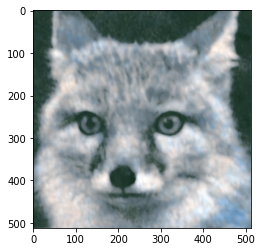

In [25]:
plt.imshow(new_dict[keys][2][199])
plt.show